## Prior

A representation of our belief about the hypothesis. How can it affect our result (posterior) ?
Let's find out!

In [1]:
%matplotlib inline
from thinkbayes2 import Suite
import thinkplot

The **Suite** class extends the Pmf class and encapsulates the update Framework, which in short mean that you don't have to write the *update* function anymore.

**Update Framework**

The update framework, takes your prior and multiplies it with the likelihood of the hypothesis given the data, which is 
equal to 
    
        P(Data)*P(Hypothesis|Data)

performing a bayesian update. We have encapsulated it in the Suite Class, so from now on we will only be focusing on the likelihood function, which calculates by how much you should update your prior.

### Coin Problem

Lets say, your close friend who has a biased coin that returns Head 70% of the time. He comes to you with a random coin and bets you some money that the coin would be head, you don't know if the coin is fair or not. Now, he says you can do 5 flips to judge whether the coin is fair or not.

We have 2 hypothesis in this problem statement 

1. The coin is fair
2. The coin is based

what will be the likelihood function to figure out whether the coin is fair or not ?

Our prior will capture out belief that the coin is biased. What is the percentage chance that the coin is biased ?

In [2]:
class Coin(Suite):
    
    def Likelihood(self, data, hypo):
        # Exercise 3.1 Is this likelihood correct ?
        x = hypo / 100
        if data == 'H':
            return x
        else:
            return 1 - x

Lets try out a uniform prior, that is all values are equally probable.

In [3]:
coin_suite = Coin(range(101))

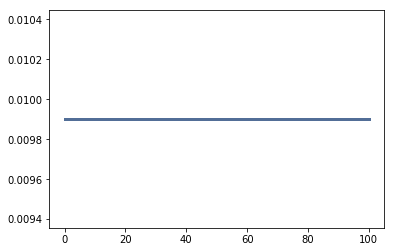

In [4]:
thinkplot.Pdf(coin_suite)

*Note:* UpdateSet does a bulk update on the prior .i.e. it will loop through all the entries given and update the prior.

In [5]:
coin_suite.UpdateSet('HHTTH')

0.016501649999999993

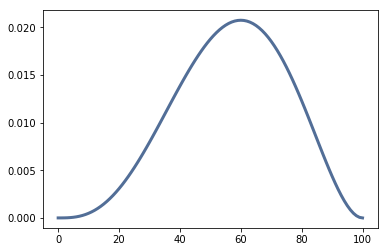

In [6]:
thinkplot.Pdf(coin_suite)

We have the posterior that tells us what we should believe based on the data and our prior, but how do we interpret it ?

###  Summarizing the Posterior

The way to interpret confidence from a posterior distribution is the wider the range, the more unsure the results are. In the chart above we are not sure of our results, but if see more data the posterior distribution will become narrower.

There are functions like that can provide statistical inference: -

1. Mean: the mean of the prior.
2. MaximumLikelihood: the Peak.
3. CredibleInterval: The credibleinterval function returns a range of values, telling us that we are 90% sure that the true probability lies in that particular interval.

All these functions and more are implemented in the Suite class.

In [7]:
coin_suite.Mean()

57.142855714428585

In [8]:
coin_suite.MaximumLikelihood()

60

In [9]:
# we are 95% sure that the true probability of the coin lies in that range, even though the range is huge.
coin_suite.CredibleInterval(95)

(22, 88)

### Coming back to our problem statement
So far, we have been using uniform prior saying all hypothesis are equally probable.Let's assume we know our friend is mischievous and we believe that there is a 60% - 80% chance that the coin is biased. 

Then we should let our prior represent this belief. The way we do that is we update the coin_suite with a distribution representing our belief. I am using a normal distribution, saying that there is more probability that its the same coin that comes up head 70% of the time.

I used scipy.stats to generate the distribution, there are lots of distribution that you can learn about in the api reference page, https://docs.scipy.org/doc/scipy/reference/stats.html. We should choose the most optimal distribution that represents our data or belief. For the moment we are going to keep this aside, but this is a TODO for anyone who is interested to know more about bayesian statistics or modeling to learn about these distributions.

In [10]:
# Lets reinitialize and set our prior
coin_suite = Coin(range(101))
from scipy.stats import norm

prior = norm.pdf(range(101), loc=60, scale=10)
for index in range (101):
    coin_suite[index] = prior[index]
coin_suite.Normalize()

0.9999745744202837

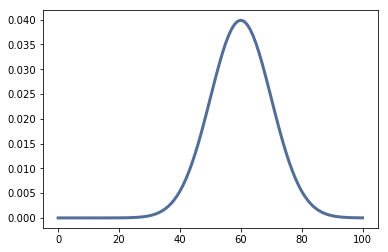

In [11]:
thinkplot.Pdf(coin_suite)

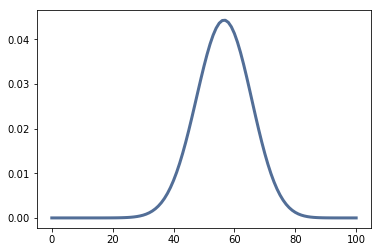

In [12]:
coin_suite.UpdateSet('HTTHT')
thinkplot.Pdf(coin_suite)

**Exercise 3.2** Do the same process above, Initialize a prior that you would believe to be true.

**Exercise 3.3** Try a bigger sequence of Heads and Tails.

**Exercise 3.4** Summarize the posterior from both the exercises above.

In [13]:
# Solution Here

In [14]:
# Solution Here

In [15]:
# Solution Here